Method to try to match lines, mainly in absorption, with known lines at different redshift. The lineid musr be identified first to discard wrong detections.

In [7]:
import sys , os
sys.path.append("../../src/lines")

import lineTools as lt
import pickle
import matplotlib.pyplot as pl

### working dir. and files
wd = "/home/stephane/Science/RadioGalaxy/ALMA/absorptions/analysis/a/"
os.chdir(wd)

datadir   = "dataSpecAll/"
dbline    = "lineAll.db"
transfile = "splatalogue.csv"
dirplot   = "plots/"

We define the source to be scanned from the lineAll.db

In [8]:
def outputMatch(matches, minmatch = 5, mainLines = None):

    for m in matches:
        imax = len(m)
        ifound = 0

        redshift = m[0]
        
        for i in range(1,len(m)):
            if len(m[i]) > 0:
                    ifound += 1
                    
        if mainLines != None:
            ifound =0
            for i in range(1,len(m)):
                    for mainline in mainLines:
                        if len(m[i]) > 0:
                            for line in m[i]:
                                if line[0].find(mainline) != -1:
                                    ifound += 1
        
        if ifound >= minmatch:
            print("########################")
            print("## Redshift: %f"%(redshift))
            print("## Freq. matched: %d"%(ifound))
            print("##")
            print("## Formula Name E_K Frequency")
            print("##              (K)   (MHz)")
            for i in range(1,len(m)):
                if len(m[i]) > 0:
                    print("## Line:")
                    for line in m[i]:
                        print line
        
            print("##      \n###END###\n")

In [9]:
source =  "J2148+0657"
redshift = 0.895

al = lt.analysisLines(dbline)
cmdsql = "select lineid FROM lines WHERE source = '%s'"%(source)
resdb = al.query(cmdsql)
lineid = []
for l in resdb:
    lineid.append(l[0])
print(lineid)

[4722, 4723, 4724, 4868, 4869, 4870, 4871, 4872, 4873, 4874, 4875, 4876, 4877, 6673, 6674, 6675, 6676, 6677, 6678, 6679, 6680, 6681, 7206, 7207, 7208]


Scan through the lines (lineid) matching with a local splatalogue.db. emax is the maximum energy of the upper level to restrain to low energy transitions...

In [10]:
m = al.scanningSplatRedshiftSourceLineid(lineid, zmin = redshift , zmax = 0.90, dz = 1e-4,nrao = True, emax= 40., absorption = True, emission = True )

## Number of lines: 25
## Redshift scanning ...
## Connect to local splatalogue ...
## Redshift: 0.89500   (0.0% done)
### Lines found: 6
## Redshift: 0.89510   (2.0% done)
### Lines found: 2
## Redshift: 0.89520   (4.0% done)
### Lines found: 2
## Redshift: 0.89530   (6.0% done)
### Lines found: 5
## Redshift: 0.89540   (8.0% done)
### Lines found: 6
## Redshift: 0.89550   (10.0% done)
### Lines found: 6
## Redshift: 0.89560   (12.0% done)
### Lines found: 3
## Redshift: 0.89570   (14.0% done)
### Lines found: 4
## Redshift: 0.89580   (16.0% done)
### Lines found: 0
## Redshift: 0.89590   (18.0% done)
### Lines found: 3
## Redshift: 0.89600   (20.0% done)
### Lines found: 4
## Redshift: 0.89610   (22.0% done)
### Lines found: 4
## Redshift: 0.89620   (24.0% done)
### Lines found: 7
## Redshift: 0.89630   (26.0% done)
### Lines found: 3
## Redshift: 0.89640   (28.0% done)
### Lines found: 4
## Redshift: 0.89650   (30.0% done)
### Lines found: 4
## Redshift: 0.89660   (32.0% done)
### L

In [11]:
redshift = []
lineDetected =[]
minmatch = 15

for l in m:
    redshift.append(l[0])
    
    ifound = 0
    
    for i in range(1,len(l)):
        if len(l[i]) > 0:
            ifound += 1
            
    if ifound >= minmatch:
        print("###Redshift: %f"%(l[0]))
        print("##")
        for line in l[1:-1]:
            if len(line) > 0:
                print line
        print("\n\n")
    
    
    lineDetected.append(ifound)

Plot the detected lines vs. the redshift.

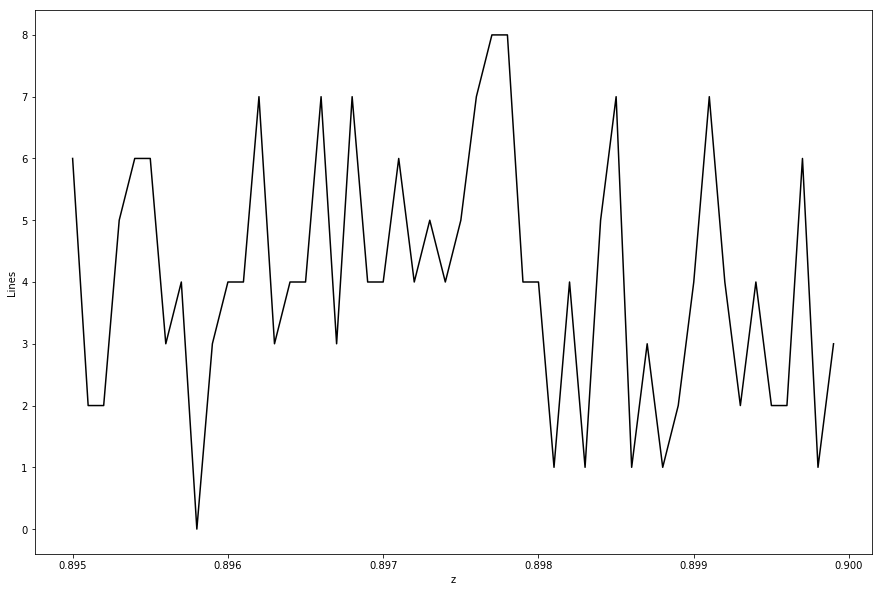

In [12]:
pl.figure(figsize=(15,10))
pl.xlabel("z")
pl.ylabel("Lines")
pl.plot(redshift, lineDetected, "k-")
pl.show()


In [13]:
## uncomment to save data in a pickle file
f = open("3c273-redshift-hires-scan.pickle","w")
pickle.dump(m,f )
f.close()


Display the matching transitions

In [14]:
mL = ['CO v=0','HCN','HCO+']
outputMatch(m, minmatch=3, mainLines = None)

########################
## Redshift: 0.895000
## Freq. matched: 6
##
## Formula Name E_K Frequency
##              (K)   (MHz)
## Line:
(u'H(zeta)', u'Hydrogen Recombination Line', u' H ( 42 ) &zeta; ', 0, 436869.024283595, 1159)
## Line:
(u'H(zeta)', u'Hydrogen Recombination Line', u' H ( 42 ) &zeta; ', 0, 436869.024283595, 1159)
## Line:
(u'SO2 v=0', u'Sulfur dioxide', u' 4( 3, 1)- 4( 0, 4)', 31.2935109206423, 461383.6909, 80)
## Line:
(u'(13)CH3OH vt=0', u'Methanol', u'      3(  1, 2)-   2( -1, 2)', 34.6491451046546, 463584.295, 319)
## Line:
(u'c-HCCCD', u'Cyclopropenylidene', u' 4( 2, 2)- 3( 2, 1)', 25.2372465788865, 193224.1783, 507)
## Line:
(u'CNCHO', u'Cyanoformaldehyde', u' 7( 2, 6)- 7( 1, 7), F= 7- 6', 25.0086429730813, 192786.83, 223)
(u'CNCHO', u'Cyanoformaldehyde', u' 7( 2, 6)- 7( 1, 7), F= 7- 8', 25.0086543952145, 192787.068, 223)
(u'CNCHO', u'Cyanoformaldehyde', u' 7( 2, 6)- 7( 1, 7), F= 6- 6', 25.0087084199853, 192788.1937, 223)
(u'CNCHO', u'Cyanoformaldehyde', u' 7( 